# <span style="color:red">Lead Scoring Case Study - Problem Statement</span>

An education company named X Education sells online courses to industry professionals. Although the company generates a large number of leads, its lead conversion rate is very poor, with only around 30% of leads getting converted to paying customers. The company wishes to increase its lead conversion rate by identifying the most potential leads, also known as 'Hot Leads'. X Education has appointed a data science team to help them select the most promising leads by building a model that assigns a lead score between 0 and 100 to each of the leads. The goal is to develop a logistic regression model that can predict the likelihood of a lead converting into a paying customer, with the aim of achieving a target lead conversion rate of around 80%. The dataset provided contains various attributes of past leads, including categorical and continuous variables, as well as the target variable 'Converted', which indicates whether a lead was converted or not. The team is expected to handle categorical variables with 'Select' levels, which are as good as null values, and to address any future problems that may arise by adjusting the logistic regression model accordingly. The final output of the project will be a set of recommendations for X Education based on the developed logistic regression model.

### <span style="color:blue">Step 1: Understanding and loading data</span>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn

import warnings
warnings.filterwarnings('ignore')

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import precision_recall_curve

import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [2]:
# Read the given CSV file, and view some sample records
pd.set_option('display.max_columns', 50)
lead_scoring = pd.read_csv('Leads.csv')
lead_scoring.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Lead Quality,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,NaN,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Interested in other courses,Low in Relevance,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,India,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,NaN,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,India,Business Administration,Select,Student,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,India,Media and Advertising,Word Of Mouth,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,Not Sure,No,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,India,Select,Other,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [3]:
#Check the shape of the dataframe
lead_scoring.shape

(9240, 37)

In [4]:
#Check the datatypes of all the columns of the dataframe
lead_scoring.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

### <span style="color:blue">Step 2: Check for missing data</span>

In [5]:
#Check the number of null values in the columns
lead_scoring.isnull().sum()

Prospect ID                                         0
Lead Number                                         0
Lead Origin                                         0
Lead Source                                        36
Do Not Email                                        0
Do Not Call                                         0
Converted                                           0
TotalVisits                                       137
Total Time Spent on Website                         0
Page Views Per Visit                              137
Last Activity                                     103
Country                                          2461
Specialization                                   1438
How did you hear about X Education               2207
What is your current occupation                  2690
What matters most to you in choosing a course    2709
Search                                              0
Magazine                                            0
Newspaper Article           

In [6]:
# Percentage of null values
round(100*(lead_scoring.isnull().sum())/len(lead_scoring.index),2)

Prospect ID                                       0.00
Lead Number                                       0.00
Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
Specialization                                   15.56
How did you hear about X Education               23.89
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Magazine                                          0.00
Newspaper 

In [7]:
# calculate the threshold for dropping columns
threshold = 0.45 * len(lead_scoring)

# drop columns with more than 45% missing values
lead_scoring = lead_scoring.dropna(thresh=len(lead_scoring)-threshold, axis=1)

round(100*(lead_scoring.isnull().sum())/len(lead_scoring.index),2)

Prospect ID                                       0.00
Lead Number                                       0.00
Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
Specialization                                   15.56
How did you hear about X Education               23.89
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Magazine                                          0.00
Newspaper 

In [8]:
# Look for any rows that are exact duplicates of each other, and delete them if necessary
print(lead_scoring.duplicated().sum())

0


### <span style="color:blue">Step 3: Remove unnecessary columns</span>

In [9]:
# Columns Prospect ID and Lead Number seem to be references and nothing more so they can be dropped
lead_scoring.drop(['Prospect ID', 'Lead Number'], axis=1, inplace=True)
lead_scoring.head()

,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,City,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,NaN,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Interested in other courses,No,No,Select,Select,No,No,Modified
1,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,India,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,No,No,Select,Select,No,No,Email Opened
2,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,India,Business Administration,Select,Student,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,No,No,Potential Lead,Mumbai,No,Yes,Email Opened
3,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,India,Media and Advertising,Word Of Mouth,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,No,No,Select,Mumbai,No,No,Modified
4,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,India,Select,Other,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,No,No,Select,Mumbai,No,No,Modified


In [10]:
# Checking the uniqueness of the data
lead_scoring.nunique()

Lead Origin                                         5
Lead Source                                        21
Do Not Email                                        2
Do Not Call                                         2
Converted                                           2
TotalVisits                                        41
Total Time Spent on Website                      1731
Page Views Per Visit                              114
Last Activity                                      17
Country                                            38
Specialization                                     19
How did you hear about X Education                 10
What is your current occupation                     6
What matters most to you in choosing a course       3
Search                                              2
Magazine                                            1
Newspaper Article                                   2
X Education Forums                                  2
Newspaper                   

In [11]:
# Dropping columns where there is a single value as that won't help in the analysis
lead_scoring = lead_scoring.loc[:, lead_scoring.nunique() != 1]
lead_scoring.nunique()

Lead Origin                                         5
Lead Source                                        21
Do Not Email                                        2
Do Not Call                                         2
Converted                                           2
TotalVisits                                        41
Total Time Spent on Website                      1731
Page Views Per Visit                              114
Last Activity                                      17
Country                                            38
Specialization                                     19
How did you hear about X Education                 10
What is your current occupation                     6
What matters most to you in choosing a course       3
Search                                              2
Newspaper Article                                   2
X Education Forums                                  2
Newspaper                                           2
Digital Advertisement       

In [12]:
round(100*(lead_scoring.isnull().sum())/len(lead_scoring.index),2).sort_values(ascending=False)

Tags                                             36.29
Lead Profile                                     29.32
What matters most to you in choosing a course    29.32
What is your current occupation                  29.11
Country                                          26.63
How did you hear about X Education               23.89
Specialization                                   15.56
City                                             15.37
TotalVisits                                       1.48
Page Views Per Visit                              1.48
Last Activity                                     1.11
Lead Source                                       0.39
Newspaper                                         0.00
A free copy of Mastering The Interview            0.00
Through Recommendations                           0.00
Digital Advertisement                             0.00
Lead Origin                                       0.00
X Education Forums                                0.00
Newspaper 

#### Tags, Lead Profile, What matters most to you in choosing a course, What is your current occupation, Country, How did you hear about X Education: Since these columns have a high percentage of null values (ranging from 23.89% to 36.29%), dropping them may result in a significant loss of data. The approach we could take is to fill these null values with a value such as "Not provided" or "Unknown".

In [13]:
lead_scoring['Tags'] = lead_scoring['Tags'].fillna('Not provided')
lead_scoring['Lead Profile'] = lead_scoring['Lead Profile'].fillna('Not provided')
lead_scoring['What matters most to you in choosing a course'] = lead_scoring['What matters most to you in choosing a course'].fillna('Not provided')
lead_scoring['What is your current occupation'] = lead_scoring['What is your current occupation'].fillna('Not provided')
lead_scoring['Country'] = lead_scoring['Country'].fillna('Unknown')
lead_scoring['How did you hear about X Education'] = lead_scoring['How did you hear about X Education'].fillna('Not provided')

#### Specialization, City: Since these columns have a moderate percentage of null values (ranging from 15.37% to 15.56%), filling the null values with the mode or median could be a good approach.

In [14]:
lead_scoring['Specialization'].fillna(lead_scoring['Specialization'].mode()[0], inplace=True)
lead_scoring['City'].fillna(lead_scoring['City'].mode()[0], inplace=True)
lead_scoring['TotalVisits'].fillna(lead_scoring['TotalVisits'].median(), inplace=True)
lead_scoring['Page Views Per Visit'].fillna(lead_scoring['Page Views Per Visit'].median(), inplace=True)

#### TotalVisits, Page Views Per Visit, Last Activity: Since these columns have a low percentage of null values (ranging from 1.11% to 1.48%), we can safely drop the rows containing missing values.

In [15]:
lead_scoring.dropna(subset=['TotalVisits', 'Page Views Per Visit', 'Last Activity', 'Lead Source'], inplace=True)

In [16]:
round(100*(lead_scoring.isnull().sum())/len(lead_scoring.index),2).sort_values(ascending=False)

Lead Origin                                      0.0
What matters most to you in choosing a course    0.0
A free copy of Mastering The Interview           0.0
City                                             0.0
Lead Profile                                     0.0
Tags                                             0.0
Through Recommendations                          0.0
Digital Advertisement                            0.0
Newspaper                                        0.0
X Education Forums                               0.0
Newspaper Article                                0.0
Search                                           0.0
What is your current occupation                  0.0
Lead Source                                      0.0
How did you hear about X Education               0.0
Specialization                                   0.0
Country                                          0.0
Last Activity                                    0.0
Page Views Per Visit                          

### <span style="color:blue">Step 4: Exploring the data</span>

In [17]:
lead_scoring['Lead Source'].value_counts()

Google               2868
Direct Traffic       2543
Olark Chat           1755
Organic Search       1154
Reference             462
Welingak Website      129
Referral Sites        125
Facebook               39
bing                    6
google                  5
Click2call              4
Press_Release           2
Social Media            2
Live Chat               2
youtubechannel          1
testone                 1
Pay per Click Ads       1
welearnblog_Home        1
WeLearn                 1
blog                    1
NC_EDM                  1
Name: Lead Source, dtype: int64

In [18]:
# Here, we need to fist combine together the different spelling formats
lead_scoring['Lead Source'] = lead_scoring['Lead Source'].replace('google', 'Google')
lead_scoring['Lead Source'].value_counts()

Google               2873
Direct Traffic       2543
Olark Chat           1755
Organic Search       1154
Reference             462
Welingak Website      129
Referral Sites        125
Facebook               39
bing                    6
Click2call              4
Social Media            2
Live Chat               2
Press_Release           2
Pay per Click Ads       1
blog                    1
WeLearn                 1
welearnblog_Home        1
youtubechannel          1
testone                 1
NC_EDM                  1
Name: Lead Source, dtype: int64

In [19]:
# Define a list of less frequent values
less_frequent = ['Referral Sites', 'Facebook', 'bing', 'Click2call', 'Press_Release', 'Social Media', 'Live Chat', 'youtubechannel', 'testone', 'Pay per Click Ads', 'welearnblog_Home', 'WeLearn', 'blog', 'NC_EDM']

# Replace these less frequent values with 'Other'
lead_scoring['Lead Source'] = lead_scoring['Lead Source'].replace(less_frequent, 'Other')
lead_scoring['Lead Source'].value_counts()

Google              2873
Direct Traffic      2543
Olark Chat          1755
Organic Search      1154
Reference            462
Other                187
Welingak Website     129
Name: Lead Source, dtype: int64

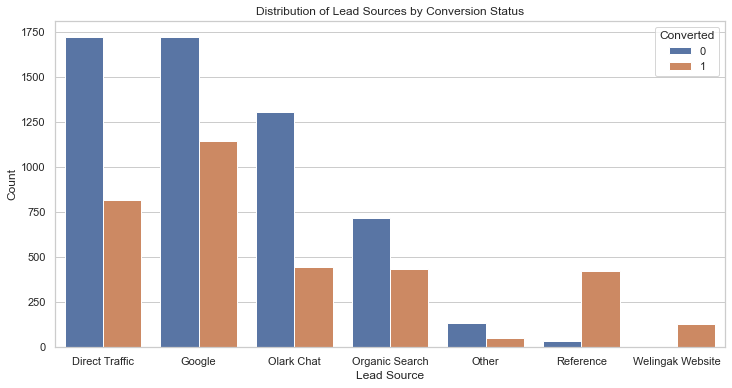

In [20]:
plt.figure(figsize=(12,6))
sns.set(style="whitegrid")

sns.countplot(x='Lead Source', hue='Converted', data=lead_scoring, order=lead_scoring['Lead Source'].value_counts().index.sort_values(ascending=True))

plt.title("Distribution of Lead Sources by Conversion Status")
plt.xlabel("Lead Source")
plt.ylabel("Count")
plt.show()

#### <span style="color:green">Finding:</span>
- References and Welingak Website have the highest conversion
- Olark Chat and Direct Traffic have a high number of leads but poor conversion
- Focus should be on increasing the conversion on the aforementioned websites
- Also, leads to Welingak Website should be increased
- References can be made more lucrative

In [21]:
lead_scoring['Total Time Spent on Website'].describe()

count    9103.000000
mean      483.773921
std       545.519186
min         0.000000
25%        12.000000
50%       247.000000
75%       924.000000
max      2272.000000
Name: Total Time Spent on Website, dtype: float64

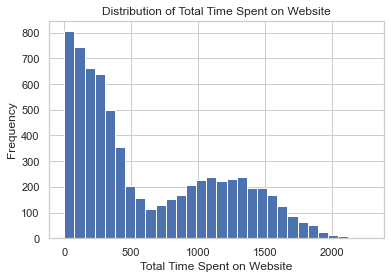

In [22]:
non_zero_total_time = lead_scoring[lead_scoring['Total Time Spent on Website'] > 0]['Total Time Spent on Website']

plt.hist(non_zero_total_time, bins=30)
plt.xlabel('Total Time Spent on Website')
plt.ylabel('Frequency')
plt.title('Distribution of Total Time Spent on Website')
plt.show()

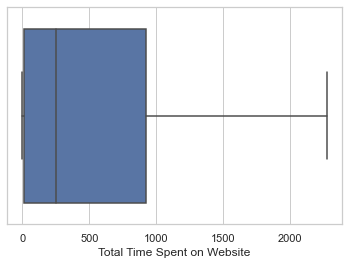

In [23]:
sns.boxplot(x=lead_scoring['Total Time Spent on Website'])
plt.show()

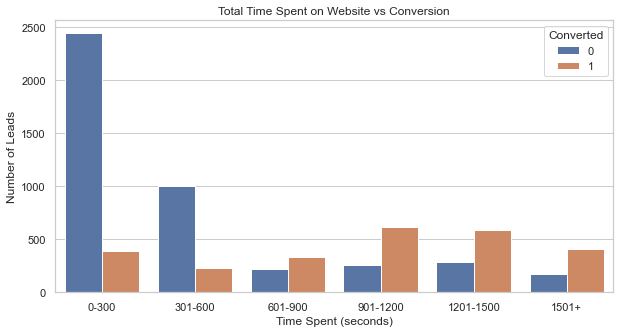

In [24]:
# create bins for the Total Time Spent on Website column
lead_scoring_copy = lead_scoring.copy()
bins = [0, 300, 600, 900, 1200, 1500, float('inf')]
labels = ['0-300', '301-600', '601-900', '901-1200', '1201-1500', '1501+']
lead_scoring_copy['Time Spent (seconds)'] = pd.cut(lead_scoring_copy['Total Time Spent on Website'], bins=bins, labels=labels)

# create a countplot with the new column
plt.figure(figsize=(10,5))
sns.countplot(x='Time Spent (seconds)', data=lead_scoring_copy, hue='Converted')
plt.title('Total Time Spent on Website vs Conversion')
plt.xlabel('Time Spent (seconds)')
plt.ylabel('Number of Leads')
plt.show()


#### <span style="color:green">Finding:</span>
- A large chunk of values lie beyond the 3rd quartile
- The average time spent on the website is ~8 minutes
- It is not surprising that higher the time spent, better is the conversion. If an individual spends over 10 minutes, he is more that 50% likely to join

In [25]:
lead_scoring['Last Activity'].value_counts()

Email Opened                    3432
SMS Sent                        2723
Olark Chat Conversation          973
Page Visited on Website          640
Converted to Lead                428
Email Bounced                    321
Email Link Clicked               267
Form Submitted on Website        116
Unreachable                       93
Unsubscribed                      59
Had a Phone Conversation          30
Approached upfront                 9
View in browser link Clicked       6
Email Received                     2
Email Marked Spam                  2
Visited Booth in Tradeshow         1
Resubscribed to emails             1
Name: Last Activity, dtype: int64

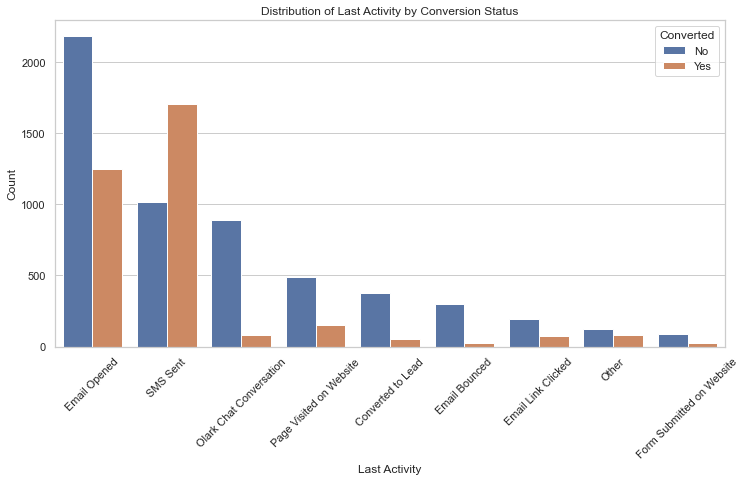

In [26]:
# create a copy of the dataframe to avoid modifying the original dataframe
lead_scoring_copy = lead_scoring.copy()

# group together the values with low counts into a new category "Other"
lead_scoring_copy.loc[~lead_scoring_copy['Last Activity'].isin(['Email Opened', 'SMS Sent', 'Olark Chat Conversation', 'Page Visited on Website', 'Converted to Lead', 'Email Bounced', 'Email Link Clicked', 'Form Submitted on Website']), 'Last Activity'] = 'Other'

# sort the dataframe by the counts of each category
sorted_df = lead_scoring_copy.groupby('Last Activity').size().reset_index(name='counts').sort_values(by='counts', ascending=False)

# plot the countplot with the new column
plt.figure(figsize=(12,6))
sns.set(style="whitegrid")

ax = sns.countplot(x='Last Activity', hue='Converted', data=lead_scoring_copy, order=sorted_df['Last Activity'])
ax

plt.title("Distribution of Last Activity by Conversion Status")
plt.xlabel("Last Activity")
plt.ylabel("Count")

# rotate the x-axis labels by 45 degrees
ax.tick_params(axis="x", labelrotation=45)

# rename the legend labels
leg_labels = ['No', 'Yes']
for t, l in zip(ax.legend_.texts, leg_labels): t.set_text(l)

plt.show()

#### <span style="color:green">Finding:</span>
- SMS' work better than other forms of communication / involvement - should look to target customers using this means

In [27]:
lead_scoring.Specialization.value_counts()

Select                               3300
Finance Management                    963
Human Resource Management             838
Marketing Management                  824
Operations Management                 499
Business Administration               402
IT Projects Management                366
Supply Chain Management               346
Banking, Investment And Insurance     335
Travel and Tourism                    202
Media and Advertising                 202
International Business                178
Healthcare Management                 156
E-COMMERCE                            111
Hospitality Management                111
Retail Management                     100
Rural and Agribusiness                 73
E-Business                             57
Services Excellence                    40
Name: Specialization, dtype: int64

In [28]:
# No specialization for 3300; renaming it to 'Not Provided' instead
lead_scoring.Specialization = lead_scoring.Specialization.replace('Select', 'Not Provided')

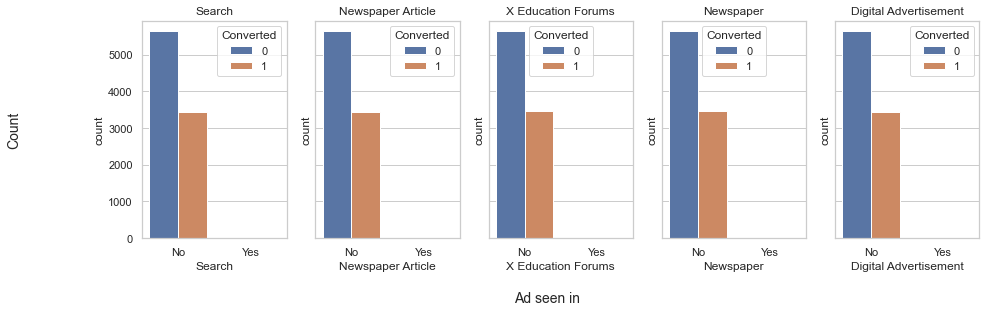

In [29]:
# create a list of the columns to plot
columns_to_plot = ['Search', 'Newspaper Article', 'X Education Forums', 'Newspaper', 'Digital Advertisement']

# create subplots using catplot
fig, axes = plt.subplots(nrows=1, ncols=len(columns_to_plot), figsize=(15, 4), sharey=True)

# plot each column separately
for i, column in enumerate(columns_to_plot):
    sns.countplot(x=column, hue='Converted', data=lead_scoring, ax=axes[i], hue_order=[0,1])
    axes[i].set_title(column)

# set the labels for the x and y axes
fig.text(0.5, -0.1, 'Ad seen in', ha='center', fontsize=14)
fig.text(0, 0.5, 'Count', va='center', rotation='vertical', fontsize=14)

plt.show()

In [30]:
ad_counts = pd.concat([
    lead_scoring.Search.value_counts().rename('Search'),
    lead_scoring['Newspaper Article'].value_counts().rename('Newspaper Article'),
    lead_scoring['X Education Forums'].value_counts().rename('X Education Forums'),
    lead_scoring.Newspaper.value_counts().rename('Newspaper'),
    lead_scoring['Digital Advertisement'].value_counts().rename('Digital Advertisement')
], axis=1)
ad_counts

,Search,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement
No,9089,9101,9102,9102,9099
Yes,14,2,1,1,4


#### <span style="color:green">Finding:</span>
- As the number of Yes' is as good as zero in all of these, the columns should be dropped
- These columns do not add much value

In [31]:
lead_scoring = lead_scoring.drop(columns=['Search', 'Newspaper Article', 'X Education Forums', 'Newspaper', 'Digital Advertisement'])
lead_scoring.head()

,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Through Recommendations,Tags,Lead Profile,City,A free copy of Mastering The Interview,Last Notable Activity
0,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,Unknown,Not Provided,Select,Unemployed,Better Career Prospects,No,Interested in other courses,Select,Select,No,Modified
1,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,India,Not Provided,Select,Unemployed,Better Career Prospects,No,Ringing,Select,Select,No,Email Opened
2,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,India,Business Administration,Select,Student,Better Career Prospects,No,Will revert after reading the email,Potential Lead,Mumbai,Yes,Email Opened
3,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,India,Media and Advertising,Word Of Mouth,Unemployed,Better Career Prospects,No,Ringing,Select,Mumbai,No,Modified
4,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,India,Not Provided,Other,Unemployed,Better Career Prospects,No,Will revert after reading the email,Select,Mumbai,No,Modified


In [32]:
lead_scoring['What is your current occupation'].value_counts()

Unemployed              5492
Not provided            2690
Working Professional     683
Student                  206
Other                     15
Housewife                  9
Businessman                8
Name: What is your current occupation, dtype: int64

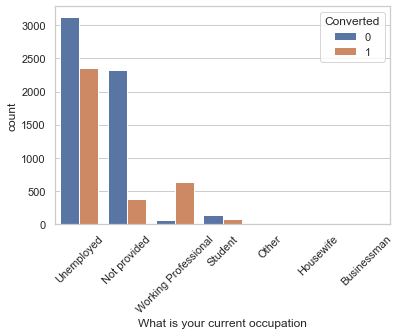

In [33]:
# get value counts and sort in descending order
occupation_counts = lead_scoring['What is your current occupation'].value_counts().sort_values(ascending=False)

# create bar chart with hue
sns.countplot(x='What is your current occupation', data=lead_scoring, hue='Converted', order=occupation_counts.index)

# set the x-label rotation to 45 degrees
plt.xticks(rotation=45)

# display the plot
plt.show()

#### <span style="color:green">Finding:</span>
- Working professionals are most likely to go for a course
- Therefore, it would be prudent to target working professionals

In [34]:
lead_scoring['Through Recommendations'].value_counts()

No     9096
Yes       7
Name: Through Recommendations, dtype: int64

#### <span style="color:green">Finding:</span>
- As the number of Yes' is as good as zero, the column should be dropped
- The column does not add much value

In [35]:
lead_scoring.drop('Through Recommendations', axis=1, inplace=True)

In [36]:
lead_scoring.Tags.value_counts()

Not provided                                         3334
Will revert after reading the email                  2026
Ringing                                              1189
Interested in other courses                           509
Already a student                                     465
Closed by Horizzon                                    311
switched off                                          240
Busy                                                  185
Lost to EINS                                          172
Not doing further education                           145
Interested  in full time MBA                          116
Graduation in progress                                111
invalid number                                         83
Diploma holder (Not Eligible)                          63
wrong number given                                     47
opp hangup                                             33
number not provided                                    25
in touch with 

In [37]:
# There are way too many values that can be clubbed together so creating a new column might help simplify it
# create a dictionary with the grouped values as keys and similar values as values
grouped_tags = {
    'Not provided': 'Not provided',
    'Will revert after reading the email': 'Will revert later',
    'Ringing': 'Not Reachable',
    'Interested in other courses': 'Interested in other courses',
    'Already a student': 'Not interested / eligible',
    'Closed by Horizzon': 'Closed by Horizzon',
    'switched off': 'Not Reachable',
    'Busy': 'Not Reachable',
    'Lost to EINS': 'EINS / Others',
    'Not doing further education': 'Not interested / eligible',
    'Interested  in full time MBA': 'Not interested / eligible',
    'Graduation in progress': 'Not interested / eligible',
    'invalid number': 'Not Reachable',
    'Diploma holder (Not Eligible)': 'Not interested / eligible',
    'wrong number given': 'Not Reachable',
    'opp hangup': 'Not Reachable',
    'number not provided': 'Not Reachable',
    'in touch with EINS': 'Others',
    'Lost to Others': 'Others',
    'Still Thinking': 'Will revert later',
    'Want to take admission but has financial problems': 'Others',
    'In confusion whether part time or DLP': 'Others',
    'Interested in Next batch': 'Others',
    'Lateral student': 'Others',
    'Shall take in the next coming month': 'Others',
    'University not recognized': 'Others',
    'Recognition issue (DEC approval)': 'Others'
}

# create a new column "Grouped Tags" with the grouped values
lead_scoring['Grouped Tags'] = lead_scoring['Tags'].replace(grouped_tags)

# print the value counts of the new column
print(lead_scoring['Grouped Tags'].value_counts())

Not provided                   3334
Will revert later              2032
Not Reachable                  1802
Not interested / eligible       900
Interested in other courses     509
Closed by Horizzon              311
EINS / Others                   172
Others                           43
Name: Grouped Tags, dtype: int64


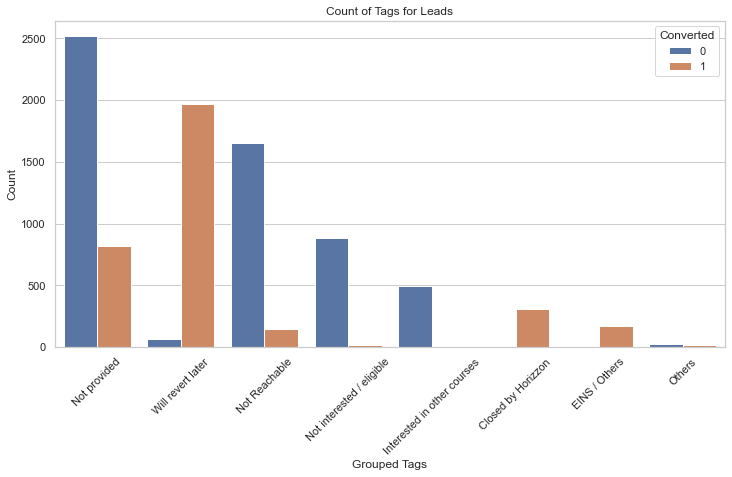

In [38]:
# get the count of each unique tag and sort by count
tag_counts = lead_scoring['Grouped Tags'].value_counts().sort_values(ascending=False)

# plot a bar chart of the tag counts
plt.figure(figsize=(12,6))
sns.countplot(x='Grouped Tags', data=lead_scoring, hue='Converted', order=tag_counts.index)
plt.xticks(rotation=45)
plt.xlabel('Grouped Tags')
plt.ylabel('Count')
plt.title('Count of Tags for Leads')
plt.show()

#### <span style="color:green">Finding:</span>
- Not reachable is a large chunk; it might help to obtain alternate contacts from the leads

In [39]:
lead_scoring['Lead Profile'].value_counts()

Select                         4063
Not provided                   2709
Potential Lead                 1568
Other Leads                     482
Student of SomeSchool           240
Lateral Student                  21
Dual Specialization Student      20
Name: Lead Profile, dtype: int64

In [40]:
lead_scoring.drop('Lead Profile', axis=1, inplace=True)

#### <span style="color:green">Finding:</span>
- Considering that over 70% of the data in this column is unknown, it would make sense to drop it

In [41]:
lead_scoring.Country.value_counts()

India                   6491
Unknown                 2325
United States             69
United Arab Emirates      53
Singapore                 24
Saudi Arabia              21
United Kingdom            15
Australia                 13
Qatar                     10
Bahrain                    7
Hong Kong                  7
Oman                       6
France                     6
unknown                    5
Kuwait                     4
South Africa               4
Canada                     4
Nigeria                    4
Germany                    4
Sweden                     3
Philippines                2
Uganda                     2
Italy                      2
Bangladesh                 2
Netherlands                2
Asia/Pacific Region        2
China                      2
Belgium                    2
Ghana                      2
Kenya                      1
Sri Lanka                  1
Tanzania                   1
Malaysia                   1
Liberia                    1
Switzerland   

In [42]:
lead_scoring.drop('Country', axis=1, inplace=True)

#### <span style="color:green">Finding:</span>
- As the primary market is India and very little data is available outside of it, the data is irrelevant

In [43]:
lead_scoring.City.value_counts()

Mumbai                         4604
Select                         2169
Thane & Outskirts               748
Other Cities                    680
Other Cities of Maharashtra     450
Other Metro Cities              378
Tier II Cities                   74
Name: City, dtype: int64

In [44]:
lead_scoring.City.replace({'Select': 'Not provided'}, inplace=True)

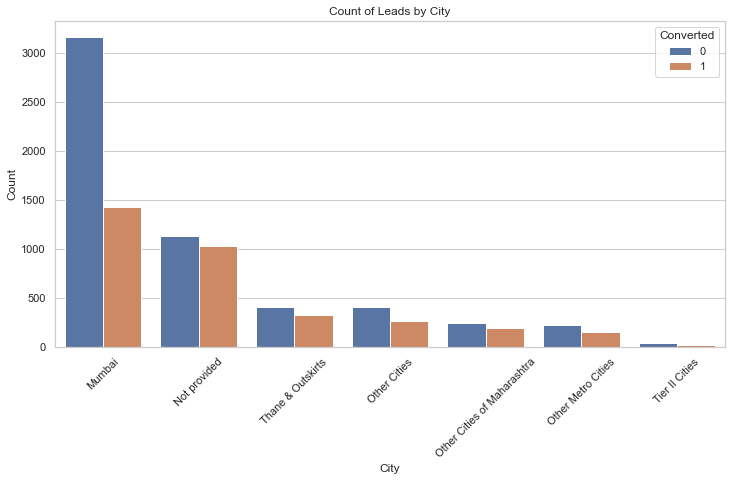

In [45]:
# get the count of each unique city and sort by count
city_counts = lead_scoring['City'].value_counts().sort_values(ascending=False)

# plot a bar chart of the city counts with hue
plt.figure(figsize=(12,6))
sns.countplot(x='City', data=lead_scoring, hue='Converted', order=city_counts.index)
plt.xticks(rotation=45)
plt.xlabel('City')
plt.ylabel('Count')
plt.title('Count of Leads by City')
plt.show()


#### <span style="color:green">Finding:</span>
- The conversion in Mumbai is very poor when compared to other cities
- Concentration should be spread to other cities as well as they're giving better results than Mumbai where the complete focus currently is

In [46]:
lead_scoring['A free copy of Mastering The Interview'].value_counts()

No     6215
Yes    2888
Name: A free copy of Mastering The Interview, dtype: int64

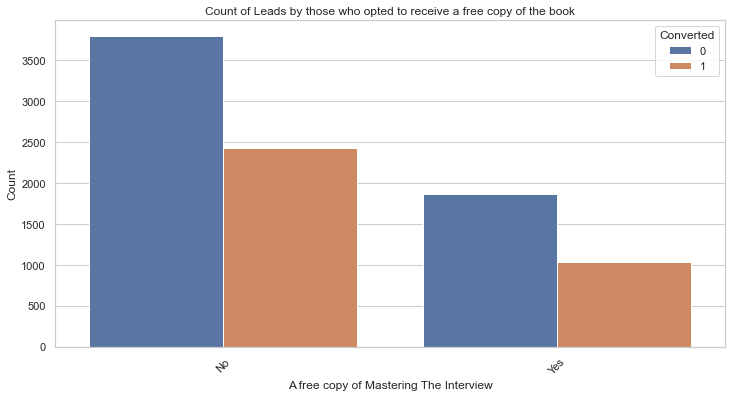

In [47]:
# get the count of those who opted to receive a free copy of the book
book_counts = lead_scoring['A free copy of Mastering The Interview'].value_counts().sort_values(ascending=False)

# plot a bar chart with hue
plt.figure(figsize=(12,6))
sns.countplot(x='A free copy of Mastering The Interview', data=lead_scoring, hue='Converted', order=book_counts.index)
plt.xticks(rotation=45)
plt.xlabel('A free copy of Mastering The Interview')
plt.ylabel('Count')
plt.title('Count of Leads by those who opted to receive a free copy of the book')
plt.show()

#### <span style="color:green">Finding:</span>
- There is not much to choose from here

In [48]:
lead_scoring['Last Notable Activity'].value_counts()

Modified                        3296
Email Opened                    2823
SMS Sent                        2152
Page Visited on Website          318
Olark Chat Conversation          183
Email Link Clicked               173
Email Bounced                     60
Unsubscribed                      45
Unreachable                       32
Had a Phone Conversation          14
Email Marked Spam                  2
Approached upfront                 1
Resubscribed to emails             1
View in browser link Clicked       1
Form Submitted on Website          1
Email Received                     1
Name: Last Notable Activity, dtype: int64

In [49]:
# get the count of each unique value in "Last Notable Activity"
lna_counts = lead_scoring['Last Notable Activity'].value_counts()

# get the list of values to replace with "Other"
values_to_replace = lna_counts[lna_counts < 10].index.tolist()

# replace the values with "Other"
lead_scoring['Last Notable Activity'] = lead_scoring['Last Notable Activity'].replace(values_to_replace, 'Other')


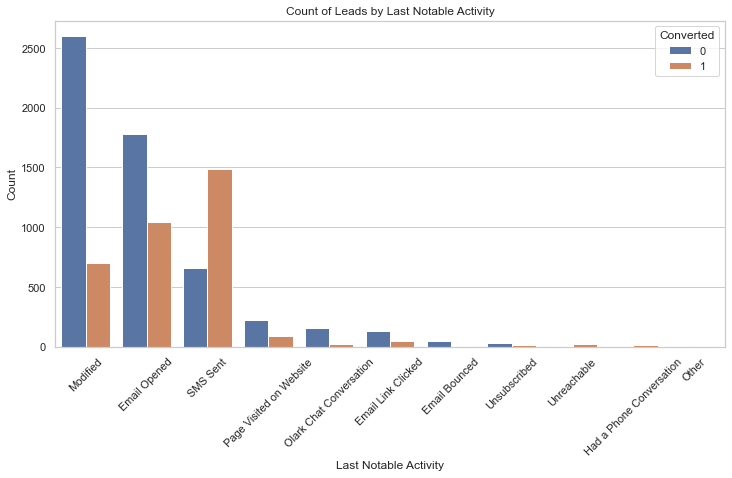

In [50]:
# get the count of Last Notable Activity
lna_counts = lead_scoring['Last Notable Activity'].value_counts().sort_values(ascending=False)

# plot a bar chart with hue
plt.figure(figsize=(12,6))
sns.countplot(x='Last Notable Activity', data=lead_scoring, hue='Converted', order=lna_counts.index)
plt.xticks(rotation=45)
plt.xlabel('Last Notable Activity')
plt.ylabel('Count')
plt.title('Count of Leads by Last Notable Activity')
plt.show()

#### <span style="color:green">Finding:</span>
- Those whose last notable activity was sending an SMS had a higher conversion ratio

In [51]:
lead_scoring['What matters most to you in choosing a course'].value_counts()

Better Career Prospects      6392
Not provided                 2709
Flexibility & Convenience       1
Other                           1
Name: What matters most to you in choosing a course, dtype: int64

In [52]:
# This column does not seem to provide a dimension; dropping it would be better
lead_scoring.drop('What matters most to you in choosing a course', axis=1, inplace=True)

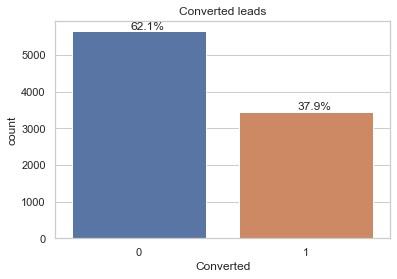

In [53]:
ax = sns.countplot(lead_scoring['Converted'])
plt.title('Converted leads')

# add percentage labels to the bars
total = len(lead_scoring['Converted'])
for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/total)
    x = p.get_x() + p.get_width()/2 - 0.05
    y = p.get_y() + p.get_height() + 50
    ax.annotate(percentage, (x, y))

plt.show()

#### <span style="color:green">Finding:</span>
- Almost two-third leads were not converted

In [54]:
contact_counts = pd.concat([
    lead_scoring['Do Not Call'].value_counts().rename('Do Not Call'),
    lead_scoring['Do Not Email'].value_counts().rename('Do Not Email'),
], axis=1)
contact_counts

,Do Not Call,Do Not Email
No,9101,8382
Yes,2,721


In [55]:
# dropping Do not Call as it is almost a single value throughout
lead_scoring.drop('Do Not Call', axis=1, inplace=True)

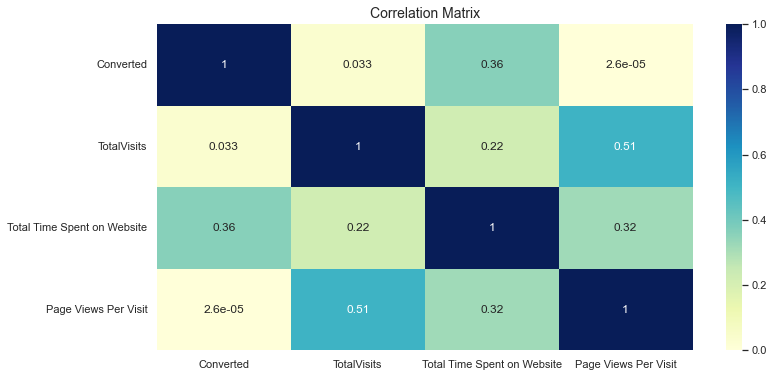

In [56]:
# check correlation between the variables
plt.figure(figsize=(12, 6))
sns.heatmap(lead_scoring.corr(), cmap='YlGnBu', annot=True, vmin=0, vmax=1)
plt.title('Correlation Matrix', fontsize=14)
plt.show()

#### <span style="color:green">Finding:</span>
- Page views per visit seems to have the least correlation with conversion rate
- Total Visits is relatively more correlated

### <span style="color:blue">Step 5: Treating outliers in the data</span>

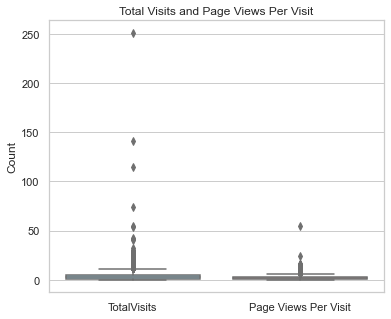

In [57]:
sns.set_style("whitegrid")
plt.figure(figsize=(6,5))

sns.boxplot(data=lead_scoring[['TotalVisits', 'Page Views Per Visit']], palette=['skyblue', 'pink'])
plt.title('Total Visits and Page Views Per Visit')
plt.ylabel('Count')
plt.show()

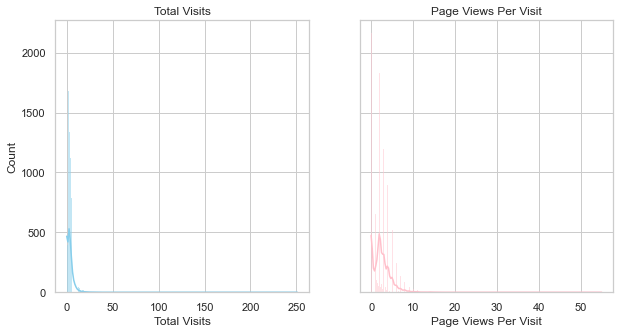

In [60]:
sns.set_style("whitegrid")

fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(10, 5), sharey=True)
fig.subplots_adjust(wspace=0.2)

sns.histplot(data=lead_scoring, x='TotalVisits', color='skyblue', ax=axs[0], kde=True)
axs[0].set_xlabel('Total Visits')
axs[0].set_ylabel('Count')
axs[0].set_title('Total Visits')

sns.histplot(data=lead_scoring, x='Page Views Per Visit', color='pink', ax=axs[1], kde=True)
axs[1].set_xlabel('Page Views Per Visit')
axs[1].set_title('Page Views Per Visit')

plt.show()

In [61]:
lead_scoring.TotalVisits.describe(percentiles=[0.1, 0.25, 0.5, 0.75, 0.9, 0.99])

count    9103.000000
mean        3.454575
std         4.851123
min         0.000000
10%         0.000000
25%         1.000000
50%         3.000000
75%         5.000000
90%         7.000000
99%        17.000000
max       251.000000
Name: TotalVisits, dtype: float64

In [62]:
lead_scoring['Page Views Per Visit'].describe(percentiles=[0.1, 0.25, 0.5, 0.75, 0.9, 0.99])

count    9103.000000
mean        2.368972
std         2.157526
min         0.000000
10%         0.000000
25%         1.000000
50%         2.000000
75%         3.000000
90%         5.000000
99%         9.000000
max        55.000000
Name: Page Views Per Visit, dtype: float64

In [63]:
lead_scoring.shape

(9103, 16)

In [64]:
pct_99 = lead_scoring['TotalVisits'].quantile(0.99)
outliers = lead_scoring[lead_scoring['TotalVisits'] > pct_99]
len(outliers)

83

In [65]:
pct_99 = lead_scoring['Page Views Per Visit'].quantile(0.99)
outliers = lead_scoring[lead_scoring['Page Views Per Visit'] > pct_99]
len(outliers)

75

In [66]:
q = lead_scoring[['TotalVisits', 'Page Views Per Visit']].quantile(0.99)
lead_scoring = lead_scoring[(lead_scoring['TotalVisits'] <= q['TotalVisits']) & (lead_scoring['Page Views Per Visit'] <= q['Page Views Per Visit'])]

In [67]:
lead_scoring.shape

(8953, 16)

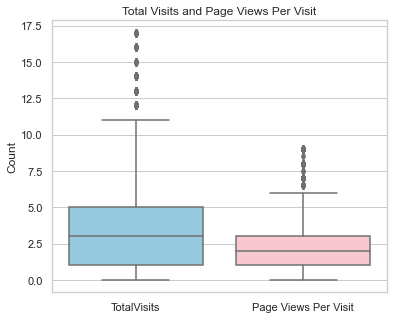

In [68]:
sns.set_style("whitegrid")
plt.figure(figsize=(6,5))

sns.boxplot(data=lead_scoring[['TotalVisits', 'Page Views Per Visit']], palette=['skyblue', 'pink'])
plt.title('Total Visits and Page Views Per Visit')
plt.ylabel('Count')
plt.show()

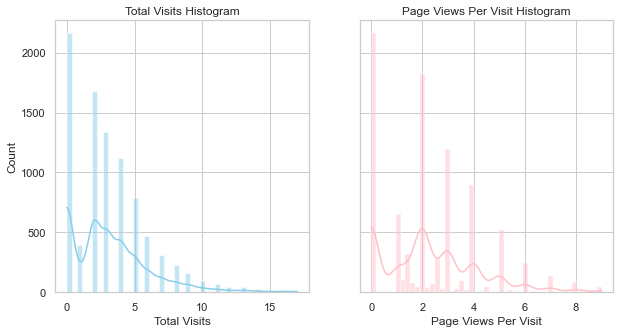

In [69]:
sns.set_style("whitegrid")

fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(10, 5), sharey=True)
fig.subplots_adjust(wspace=0.2)

sns.histplot(data=lead_scoring, x='TotalVisits', color='skyblue', ax=axs[0], kde=True)
axs[0].set_xlabel('Total Visits')
axs[0].set_ylabel('Count')
axs[0].set_title('Total Visits Histogram')

sns.histplot(data=lead_scoring, x='Page Views Per Visit', color='pink', ax=axs[1], kde=True)
axs[1].set_xlabel('Page Views Per Visit')
axs[1].set_title('Page Views Per Visit Histogram')

plt.show()

In [70]:
lead_scoring.columns

Index(['Lead Origin', 'Lead Source', 'Do Not Email', 'Converted',
       'TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit',
       'Last Activity', 'Specialization', 'How did you hear about X Education',
       'What is your current occupation', 'Tags', 'City',
       'A free copy of Mastering The Interview', 'Last Notable Activity',
       'Grouped Tags'],
      dtype='object')

In [71]:
# drop Tags column as it has been replaced with a column that is a bit more standardized
lead_scoring.drop('Tags', axis=1, inplace=True)

In [72]:
lead_scoring['How did you hear about X Education'].value_counts()

Select                   4825
Not provided             2171
Online Search             792
Word Of Mouth             343
Student of SomeSchool     308
Other                     181
Multiple Sources          152
Advertisements             67
Social Media               65
Email                      26
SMS                        23
Name: How did you hear about X Education, dtype: int64

In [73]:
# as over 70% of the data in this column is unknown, dropping the column
lead_scoring.drop('How did you hear about X Education', axis=1, inplace=True)

### <span style="color:blue">Step 6: Data Preprocessing</span>

In [74]:
# select categorical columns
lead_scoring.select_dtypes(include='object').columns.tolist()

['Lead Origin',
 'Lead Source',
 'Do Not Email',
 'Last Activity',
 'Specialization',
 'What is your current occupation',
 'City',
 'A free copy of Mastering The Interview',
 'Last Notable Activity',
 'Grouped Tags']

In [75]:
# converting binary variables into numerical variables in order to use it in further algorithms
lead_scoring['A free copy of Mastering The Interview'] = lead_scoring['A free copy of Mastering The Interview'].replace({'Yes': 1, 'No': 0})
lead_scoring['Do Not Email'] = lead_scoring['Do Not Email'].replace({'Yes': 1, 'No': 0})

In [76]:
# create dummy
cat_cols = ['Lead Origin', 'Lead Source', 'Last Activity', 'Specialization', 
            'What is your current occupation', 
            'City', 'Last Notable Activity', 'Grouped Tags']

# create dummy variables for each categorical column
for col in cat_cols:
    dummy = pd.get_dummies(lead_scoring[col], prefix=col, prefix_sep='_', drop_first=True)
    lead_scoring = pd.concat([lead_scoring, dummy], axis=1)
    
# drop the original categorical columns
lead_scoring.drop(cat_cols, axis=1, inplace=True)
lead_scoring.head()

,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,A free copy of Mastering The Interview,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Other,Lead Source_Reference,Lead Source_Welingak Website,Last Activity_Converted to Lead,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Marked Spam,Last Activity_Email Opened,Last Activity_Email Received,Last Activity_Form Submitted on Website,Last Activity_Had a Phone Conversation,Last Activity_Olark Chat Conversation,Last Activity_Page Visited on Website,...,What is your current occupation_Unemployed,What is your current occupation_Working Professional,City_Not provided,City_Other Cities,City_Other Cities of Maharashtra,City_Other Metro Cities,City_Thane & Outskirts,City_Tier II Cities,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Opened,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Other,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Grouped Tags_EINS / Others,Grouped Tags_Interested in other courses,Grouped Tags_Not Reachable,Grouped Tags_Not interested / eligible,Grouped Tags_Not provided,Grouped Tags_Others,Grouped Tags_Will revert later
0,0,0,0.0,0,0.0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,...,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0
1,0,0,5.0,674,2.5,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,...,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
2,0,1,2.0,1532,2.0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
3,0,0,1.0,305,1.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0
4,0,1,2.0,1428,1.0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1


### <span style="color:blue">Step 7: Train-Test split</span>

In [77]:
X_train, X_test, y_train, y_test = train_test_split(lead_scoring.drop('Converted', axis=1), 
                                                    lead_scoring['Converted'], 
                                                    test_size=0.3, 
                                                    random_state=42)

In [78]:
lead_scoring.columns

Index(['Do Not Email', 'Converted', 'TotalVisits',
       'Total Time Spent on Website', 'Page Views Per Visit',
       'A free copy of Mastering The Interview',
       'Lead Origin_Landing Page Submission', 'Lead Origin_Lead Add Form',
       'Lead Origin_Lead Import', 'Lead Source_Google',
       'Lead Source_Olark Chat', 'Lead Source_Organic Search',
       'Lead Source_Other', 'Lead Source_Reference',
       'Lead Source_Welingak Website', 'Last Activity_Converted to Lead',
       'Last Activity_Email Bounced', 'Last Activity_Email Link Clicked',
       'Last Activity_Email Marked Spam', 'Last Activity_Email Opened',
       'Last Activity_Email Received',
       'Last Activity_Form Submitted on Website',
       'Last Activity_Had a Phone Conversation',
       'Last Activity_Olark Chat Conversation',
       'Last Activity_Page Visited on Website',
       'Last Activity_Resubscribed to emails', 'Last Activity_SMS Sent',
       'Last Activity_Unreachable', 'Last Activity_Unsubscribed'

### <span style="color:blue">Step 8: Feature Scaling</span>

In [79]:
# create a list of eligible columns
eligible_cols = ['TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit']

# instantiate the StandardScaler
scaler = StandardScaler()

# fit and transform the eligible columns
lead_scoring[eligible_cols] = scaler.fit_transform(lead_scoring[eligible_cols])

In [80]:
lead_scoring.head()

,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,A free copy of Mastering The Interview,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Other,Lead Source_Reference,Lead Source_Welingak Website,Last Activity_Converted to Lead,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Marked Spam,Last Activity_Email Opened,Last Activity_Email Received,Last Activity_Form Submitted on Website,Last Activity_Had a Phone Conversation,Last Activity_Olark Chat Conversation,Last Activity_Page Visited on Website,...,What is your current occupation_Unemployed,What is your current occupation_Working Professional,City_Not provided,City_Other Cities,City_Other Cities of Maharashtra,City_Other Metro Cities,City_Thane & Outskirts,City_Tier II Cities,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Opened,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Other,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Grouped Tags_EINS / Others,Grouped Tags_Interested in other courses,Grouped Tags_Not Reachable,Grouped Tags_Not interested / eligible,Grouped Tags_Not provided,Grouped Tags_Others,Grouped Tags_Will revert later
0,0,0,-1.087739,-0.881705,-1.202121,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,...,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0
1,0,0,0.637421,0.355838,0.119988,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,...,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
2,0,1,-0.397675,1.931227,-0.144434,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
3,0,0,-0.742707,-0.321689,-0.673278,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0
4,0,1,-0.397675,1.740270,-0.673278,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1


### <span style="color:blue">Step 9: Model Building using RFE and statsmodel</span>

In [81]:
# Initializing logistic regression model object
logreg = LogisticRegression()

In [82]:
rfe = RFE(logreg, n_features_to_select=15)             # running RFE with 15 variables as output
rfe = rfe.fit(X_train, y_train)

In [83]:
# check the column that was selected by RFE, and the ranking of the column according to RFE
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('Do Not Email', True, 1),
 ('TotalVisits', False, 42),
 ('Total Time Spent on Website', False, 60),
 ('Page Views Per Visit', False, 41),
 ('A free copy of Mastering The Interview', False, 46),
 ('Lead Origin_Landing Page Submission', False, 5),
 ('Lead Origin_Lead Add Form', False, 16),
 ('Lead Origin_Lead Import', True, 1),
 ('Lead Source_Google', False, 17),
 ('Lead Source_Olark Chat', False, 45),
 ('Lead Source_Organic Search', False, 18),
 ('Lead Source_Other', False, 44),
 ('Lead Source_Reference', False, 22),
 ('Lead Source_Welingak Website', True, 1),
 ('Last Activity_Converted to Lead', True, 1),
 ('Last Activity_Email Bounced', False, 50),
 ('Last Activity_Email Link Clicked', False, 30),
 ('Last Activity_Email Marked Spam', False, 49),
 ('Last Activity_Email Opened', False, 29),
 ('Last Activity_Email Received', False, 54),
 ('Last Activity_Form Submitted on Website', False, 28),
 ('Last Activity_Had a Phone Conversation', True, 1),
 ('Last Activity_Olark Chat Conversation

In [84]:
# To check the columns selected
print(X_train.columns[rfe.support_])

Index(['Do Not Email', 'Lead Origin_Lead Import',
       'Lead Source_Welingak Website', 'Last Activity_Converted to Lead',
       'Last Activity_Had a Phone Conversation',
       'Last Activity_Olark Chat Conversation',
       'What is your current occupation_Not provided',
       'Last Notable Activity_SMS Sent', 'Last Notable Activity_Unsubscribed',
       'Grouped Tags_EINS / Others',
       'Grouped Tags_Interested in other courses',
       'Grouped Tags_Not Reachable', 'Grouped Tags_Not interested / eligible',
       'Grouped Tags_Not provided', 'Grouped Tags_Others'],
      dtype='object')


In [85]:
# To check the columns dropped
print(X_train.columns[~rfe.support_])

Index(['TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit',
       'A free copy of Mastering The Interview',
       'Lead Origin_Landing Page Submission', 'Lead Origin_Lead Add Form',
       'Lead Source_Google', 'Lead Source_Olark Chat',
       'Lead Source_Organic Search', 'Lead Source_Other',
       'Lead Source_Reference', 'Last Activity_Email Bounced',
       'Last Activity_Email Link Clicked', 'Last Activity_Email Marked Spam',
       'Last Activity_Email Opened', 'Last Activity_Email Received',
       'Last Activity_Form Submitted on Website',
       'Last Activity_Page Visited on Website',
       'Last Activity_Resubscribed to emails', 'Last Activity_SMS Sent',
       'Last Activity_Unreachable', 'Last Activity_Unsubscribed',
       'Last Activity_View in browser link Clicked',
       'Last Activity_Visited Booth in Tradeshow',
       'Specialization_Business Administration', 'Specialization_E-Business',
       'Specialization_E-COMMERCE', 'Specialization_Finan

In [86]:
# using statsmodel
col = X_train.columns[rfe.support_]
X_train_sm = sm.add_constant(X_train[col])     # adds a constant term to the training set to compute the intercept
logm1 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())     # fits the generalized linear model (GLM) with binomial family 
res = logm1.fit()     # fits the logistic regression model using the training set
print(res.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Converted   No. Observations:                 6267
Model:                            GLM   Df Residuals:                     6251
Model Family:                Binomial   Df Model:                           15
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1340.8
Date:                Mon, 17 Apr 2023   Deviance:                       2681.6
Time:                        23:55:01   Pearson chi2:                 8.32e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.5919
Covariance Type:            nonrobust                                         
                                                   coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------

In [87]:
# p-value of Lead Source_Welingak Website is high thus, dropping it
col = col.drop('Lead Source_Welingak Website', 1)

In [88]:
# re-building the model
X_train_sm = sm.add_constant(X_train[col])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
print(res.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Converted   No. Observations:                 6267
Model:                            GLM   Df Residuals:                     6252
Model Family:                Binomial   Df Model:                           14
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1356.1
Date:                Mon, 17 Apr 2023   Deviance:                       2712.2
Time:                        23:55:01   Pearson chi2:                 8.54e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.5899
Covariance Type:            nonrobust                                         
                                                   coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------

In [89]:
# p-value of Lead Origin_Lead Import is high thus, dropping it
col = col.drop('Lead Origin_Lead Import', 1)

In [90]:
# re-building the model
X_train_sm = sm.add_constant(X_train[col])
logm3 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm3.fit()
print(res.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Converted   No. Observations:                 6267
Model:                            GLM   Df Residuals:                     6253
Model Family:                Binomial   Df Model:                           13
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1357.9
Date:                Mon, 17 Apr 2023   Deviance:                       2715.8
Time:                        23:55:01   Pearson chi2:                 8.53e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.5896
Covariance Type:            nonrobust                                         
                                                   coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------

### <span style="color:blue">Step 10: Model Evaluation</span>

In [91]:
# Check for the VIF values of the feature variables. 
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
11,Grouped Tags_Not provided,4.48
4,What is your current occupation_Not provided,4.31
3,Last Activity_Olark Chat Conversation,1.25
5,Last Notable Activity_SMS Sent,1.22
0,Do Not Email,1.20
9,Grouped Tags_Not Reachable,1.18
1,Last Activity_Converted to Lead,1.10
10,Grouped Tags_Not interested / eligible,1.10
6,Last Notable Activity_Unsubscribed,1.08
8,Grouped Tags_Interested in other courses,1.08


#### <span style="color:green">Finding:</span>
- VIF for all variables is under 5 so no issues here

In [92]:
# predict on test data
y_pred = res.predict(X_train_sm)
y_pred = y_pred.values.reshape(-1)
y_pred[:10]

array([0.02549223, 0.02453228, 0.02453228, 0.64571877, 0.09864398,
       0.02453228, 0.02174531, 0.02549223, 0.09864398, 0.34567845])

In [93]:
y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Conversion_prob':y_pred})
y_train_pred_final['ID'] = y_train.index
y_train_pred_final.head()

,Converted,Conversion_prob,ID
0,0,0.025492,3378
1,0,0.024532,2263
2,0,0.024532,4228
3,0,0.645719,940
4,0,0.098644,8688


In [94]:
# Creating new column 'predicted' with 1 if Churn_Prob > 0.5 else 0
y_train_pred_final['Predicted'] = y_train_pred_final.Conversion_prob.map(lambda x: 1 if x > 0.5 else 0)
y_train_pred_final.head()

,Converted,Conversion_prob,ID,Predicted
0,0,0.025492,3378,0
1,0,0.024532,2263,0
2,0,0.024532,4228,0
3,0,0.645719,940,1
4,0,0.098644,8688,0


In [95]:
# Let's check the overall accuracy.
print(metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.Predicted))

0.9283548747407053


In [96]:
# Confusion matrix 
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.Predicted)
print(confusion)

[[3705  206]
 [ 243 2113]]


<table style="width:50%; float:left">
  <tr>
    <th></th>
    <th>Actual Positive</th> 
    <th>Actual Negative</th>
  </tr>
  <tr>
    <td>Predicted Positive</td>
    <td>3705</td> 
    <td>206</td>
  </tr>
  <tr>
    <td>Predicted Negative	</td>
    <td>243</td> 
    <td>2113</td>
  </tr>
</table>


In [97]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [98]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.8968590831918506

In [99]:
# Let us calculate specificity
TN / float(TN+FP)

0.9473280490923037

In [100]:
# Calculate false postive rate - predicting churn when customer does not have churned
print(FP/ float(TN+FP))

0.05267195090769624


In [101]:
# positive predictive value 
print (TP / float(TP+FP))

0.9111686071582579


In [102]:
# Negative predictive value
print (TN / float(TN+ FN))

0.9384498480243161


### <span style="color:blue">Step 11: Plotting the ROC Curve</span>

In [103]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [104]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.Converted, y_train_pred_final.Conversion_prob, drop_intermediate = False )

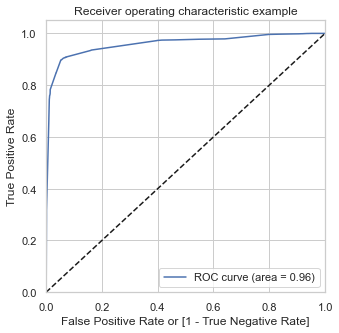

In [105]:
draw_roc(y_train_pred_final.Converted, y_train_pred_final.Conversion_prob)

#### <span style="color:green">Finding:</span>
- ROC value of 0.96 indicates that the model has a high true positive rate and a low false positive rate, which is generally considered a good performance

### <span style="color:blue">Step 12: Finding Optimal Cutoff Point</span>

In [106]:
# Let's create columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Conversion_prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,Converted,Conversion_prob,ID,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.025492,3378,0,1,0,0,0,0,0,0,0,0,0
1,0,0.024532,2263,0,1,0,0,0,0,0,0,0,0,0
2,0,0.024532,4228,0,1,0,0,0,0,0,0,0,0,0
3,0,0.645719,940,1,1,1,1,1,1,1,1,0,0,0
4,0,0.098644,8688,0,1,0,0,0,0,0,0,0,0,0


In [107]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.375937  1.000000  0.000000
0.1   0.1  0.874900  0.935484  0.838405
0.2   0.2  0.876017  0.933786  0.841217
0.3   0.3  0.926919  0.898557  0.944004
0.4   0.4  0.928355  0.896859  0.947328
0.5   0.5  0.928355  0.896859  0.947328
0.6   0.6  0.920377  0.848472  0.963692
0.7   0.7  0.909047  0.782683  0.985170
0.8   0.8  0.907292  0.778014  0.985170
0.9   0.9  0.895644  0.741511  0.988494


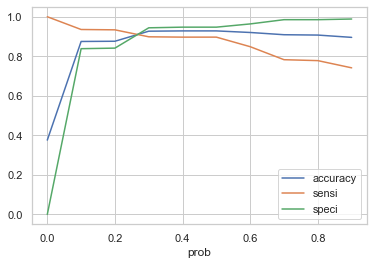

In [108]:
# Let's plot accuracy sensitivity and specificity for various probabilities.
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

#### <span style="color:green">Finding:</span>
- From the curve above, 0.28 is the optimum point to take it as a cutoff probability.

In [109]:
# If the probability of conversion is greater than 0.28, then the value will be 1, otherwise 0
y_train_pred_final['final_predicted'] = y_train_pred_final.Conversion_prob.map( lambda x: 1 if x > 0.28 else 0)
y_train_pred_final.head()

,Converted,Conversion_prob,ID,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,0,0.025492,3378,0,1,0,0,0,0,0,0,0,0,0,0
1,0,0.024532,2263,0,1,0,0,0,0,0,0,0,0,0,0
2,0,0.024532,4228,0,1,0,0,0,0,0,0,0,0,0,0
3,0,0.645719,940,1,1,1,1,1,1,1,1,0,0,0,1
4,0,0.098644,8688,0,1,0,0,0,0,0,0,0,0,0,0


In [110]:
# Let's check the overall accuracy.
metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted)

0.9253231211105792

In [111]:
# creating confusion matrix using actual and predicted values
confusion2 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_predicted )
confusion2

array([[3668,  243],
       [ 225, 2131]])

In [112]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [113]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.9044991511035654

In [114]:
# Let us calculate specificity
TN / float(TN+FP)

0.9378675530554845

In [115]:
# Calculate false postive rate - predicting churn when customer does not have churned
print(FP/ float(TN+FP))

0.06213244694451547


In [116]:
# Positive predictive value 
print (TP / float(TP+FP))

0.8976411120471778


In [117]:
# Negative predictive value
print (TN / float(TN+ FN))

0.9422039558181351


### <span style="color:blue">Step 13: Precision and Recall</span>

In [118]:
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.Predicted )
confusion

array([[3705,  206],
       [ 243, 2113]])

In [119]:
# Precision
precision_score(y_train_pred_final.Converted, y_train_pred_final.Predicted)

0.9111686071582579

In [120]:
# Recall
recall_score(y_train_pred_final.Converted, y_train_pred_final.Predicted)

0.8968590831918506

In [121]:
# Precision and recall tradeoff
p, r, thresholds = precision_recall_curve(y_train_pred_final.Converted, y_train_pred_final.Conversion_prob)

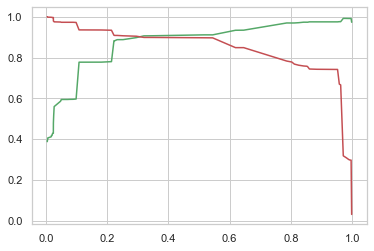

In [122]:
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.show()

### <span style="color:blue">Step 14: Making predictions on the test set</span>

In [123]:
X_test = X_test[col]
X_test.head()

,Do Not Email,Last Activity_Converted to Lead,Last Activity_Had a Phone Conversation,Last Activity_Olark Chat Conversation,What is your current occupation_Not provided,Last Notable Activity_SMS Sent,Last Notable Activity_Unsubscribed,Grouped Tags_EINS / Others,Grouped Tags_Interested in other courses,Grouped Tags_Not Reachable,Grouped Tags_Not interested / eligible,Grouped Tags_Not provided,Grouped Tags_Others
5098,0,0,0,1,1,0,0,0,0,0,0,1,0
4531,0,0,0,0,0,1,0,0,0,0,0,0,0
3181,0,0,0,0,1,1,0,0,0,0,0,1,0
7457,0,0,0,0,0,0,0,0,0,1,0,0,0
6974,0,0,0,0,0,1,0,0,0,0,0,0,0


In [124]:
X_test_sm = sm.add_constant(X_test)

In [125]:
# Making predictions on the test set
y_test_pred = res.predict(X_test_sm)
y_test_pred[:10]

5098    0.024532
4531    0.996430
3181    0.544466
7457    0.024340
6974    0.996430
8327    0.854509
5761    0.024340
7150    0.962347
5992    0.962347
1138    0.645719
dtype: float64

In [126]:
# Converting y_pred to a dataframe which is an array
y_pred_1 = pd.DataFrame(y_test_pred)

In [127]:
# Let's see the head
y_pred_1.head()

,0
5098,0.024532
4531,0.996430
3181,0.544466
7457,0.024340
6974,0.996430


In [128]:
# Converting y_test to dataframe
y_test_df = pd.DataFrame(y_test)

In [129]:
# Putting ID to index
y_test_df['ID'] = y_test_df.index

In [130]:
# Removing index for both dataframes to append them side by side 
y_pred_1.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

In [131]:
# Appending y_test_df and y_pred_1
y_pred_final = pd.concat([y_test_df, y_pred_1],axis=1)

In [132]:
y_pred_final.head()

,Converted,ID,0
0,0,5098,0.024532
1,1,4531,0.996430
2,0,3181,0.544466
3,0,7457,0.024340
4,1,6974,0.996430


In [133]:
# Renaming the column 
y_pred_final= y_pred_final.rename(columns={ 0 : 'Conversion_Prob'})

In [134]:
# Rearranging the columns
y_pred_final = y_pred_final.reindex(['ID','Converted','Conversion_Prob'], axis=1)

In [135]:
# Let's see the head of y_pred_final
y_pred_final.head()

,ID,Converted,Conversion_Prob
0,5098,0,0.024532
1,4531,1,0.996430
2,3181,0,0.544466
3,7457,0,0.024340
4,6974,1,0.996430


In [136]:
y_pred_final['final_predicted'] = y_pred_final.Conversion_Prob.map(lambda x: 1 if x > 0.3 else 0)
y_pred_final.head()

,ID,Converted,Conversion_Prob,final_predicted
0,5098,0,0.024532,0
1,4531,1,0.996430,1
2,3181,0,0.544466,1
3,7457,0,0.024340,0
4,6974,1,0.996430,1


In [137]:
# Let's check the overall accuracy.
metrics.accuracy_score(y_pred_final.Converted, y_pred_final.final_predicted)

0.9300074460163812

In [138]:
confusion2 = metrics.confusion_matrix(y_pred_final.Converted, y_pred_final.final_predicted )
confusion2

array([[1567,   89],
       [  99,  931]])

In [139]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [140]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.903883495145631

In [141]:
# Let us calculate specificity
TN / float(TN+FP)

0.946256038647343

## <span style="color:green">Finding:</span>

Based on the given figures, it can be observed that the model has performed consistently well on both the train and test data with high accuracy, sensitivity, and specificity scores. The accuracy score of 0.93 indicates that 93% of the time, the model is correctly predicting whether a lead will be converted or not. The sensitivity score of 0.90 indicates that the model is able to correctly identify 90% of the leads that actually get converted. The specificity score of 0.94 on the train data and 0.95 on the test data indicates that the model is able to correctly identify 94% and 95% of the leads that do not get converted respectively. These scores indicate that the model is reliable and can be used for lead conversion prediction with a high degree of accuracy.

<br>
<div style="float:left; margin-right: 20px;">
    <table>
        <tr>
            <th></th>
            <th>Train Data</th>
            <th>Test Data</th>
        </tr>
        <tr>
            <td>Accuracy</td>
            <td>0.93</td>
            <td>0.93</td>
        </tr>
        <tr>
            <td>Sensitivity</td>
            <td>0.90</td>
            <td>0.90</td>
        </tr>
        <tr>
            <td>Specificity</td>
            <td>0.94</td>
            <td>0.95</td>
        </tr>
    </table>
</div>

## <span style="color:purple">Questions</span>
1. Which are the top three variables in your model which contribute most towards the probability of a lead getting converted?

In [142]:
# Set the display format of the floating point numbers to two decimal places
pd.options.display.float_format = '{:.2f}'.format

# Extract the parameter estimates from the fitted model results starting from the second element 
# as the first element is the intercept
new_params = res.params[1:]

new_params

Do Not Email                                   -1.69
Last Activity_Converted to Lead                -1.84
Last Activity_Had a Phone Conversation         -1.78
Last Activity_Olark Chat Conversation          -1.47
What is your current occupation_Not provided   -2.81
Last Notable Activity_SMS Sent                  2.39
Last Notable Activity_Unsubscribed              1.57
Grouped Tags_EINS / Others                      3.08
Grouped Tags_Interested in other courses       -6.83
Grouped Tags_Not Reachable                     -6.93
Grouped Tags_Not interested / eligible         -6.88
Grouped Tags_Not provided                      -2.64
Grouped Tags_Others                            -3.88
dtype: float64

In [143]:
# Normalize the coefficients to compare their importance
imp_feat = new_params

# Scale the coefficients by the maximum coefficient value and multiply by 100
imp_feat = 100.0 * (imp_feat / imp_feat.max())
imp_feat.sort_values(ascending = False)

Grouped Tags_EINS / Others                      100.00
Last Notable Activity_SMS Sent                   77.66
Last Notable Activity_Unsubscribed               51.11
Last Activity_Olark Chat Conversation           -47.77
Do Not Email                                    -54.86
Last Activity_Had a Phone Conversation          -57.96
Last Activity_Converted to Lead                 -59.70
Grouped Tags_Not provided                       -85.78
What is your current occupation_Not provided    -91.37
Grouped Tags_Others                            -126.01
Grouped Tags_Interested in other courses       -221.71
Grouped Tags_Not interested / eligible         -223.64
Grouped Tags_Not Reachable                     -225.18
dtype: float64

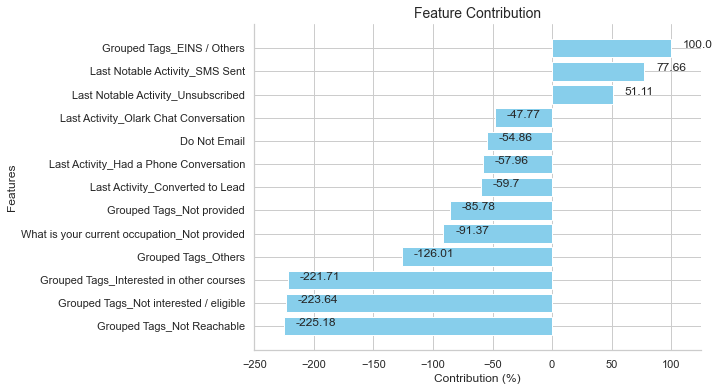

In [144]:
# create a horizontal bar chart
imp_feat_sorted = imp_feat.sort_values()
fig, ax = plt.subplots(figsize=(8,6))
ax.barh(imp_feat_sorted.index, imp_feat_sorted.values, color='skyblue')

# set x-axis limits
ax.set_xlim([-250, 125])

# add labels to x and y axes, and a title
ax.set_xlabel('Contribution (%)', fontsize=12)
ax.set_ylabel('Features', fontsize=12)
ax.set_title('Feature Contribution', fontsize=14)

# remove top and right borders
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# add annotations to the bars
for i, v in enumerate(imp_feat_sorted.values):
    ax.text(v + 10, i, str(round(v,2)), fontsize=12)

# show the chart
plt.show()

In [145]:
pd.DataFrame(imp_feat).reset_index().sort_values(by=0,ascending=False).head(3)

,index,0
7,Grouped Tags_EINS / Others,100.00
5,Last Notable Activity_SMS Sent,77.66
6,Last Notable Activity_Unsubscribed,51.11
